<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Extensions-to-Regression" data-toc-modified-id="Extensions-to-Regression-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Extensions to Regression</a></span><ul class="toc-item"><li><span><a href="#Log-Transformations" data-toc-modified-id="Log-Transformations-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Log Transformations</a></span></li><li><span><a href="#Feature-Scaling-&amp;-Normalization" data-toc-modified-id="Feature-Scaling-&amp;-Normalization-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Feature Scaling &amp; Normalization</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Different-ways-to-scale" data-toc-modified-id="Different-ways-to-scale-1.2.0.1"><span class="toc-item-num">1.2.0.1&nbsp;&nbsp;</span>Different ways to scale</a></span></li><li><span><a href="#Should-I-normalize/scale-or-standardize?" data-toc-modified-id="Should-I-normalize/scale-or-standardize?-1.2.0.2"><span class="toc-item-num">1.2.0.2&nbsp;&nbsp;</span>Should I normalize/scale or standardize?</a></span></li></ul></li></ul></li><li><span><a href="#Polynomials" data-toc-modified-id="Polynomials-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Polynomials</a></span></li><li><span><a href="#Bias-Variance-Trade-Off" data-toc-modified-id="Bias-Variance-Trade-Off-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Bias Variance Trade-Off</a></span></li></ul></li></ul></div>

# Extensions to Regression 
* Log Transformations 
* Feature Scaling & Normalizing & Standardization 
* Polynomials 
* Bias & Variance 


## Log Transformations 
We use log transformations in linear regression to make skewed or exponential distributions more normal.

A regression model will have unit changes between the x and y variables, where a single unit change in x will coincide with a constant change in y. Taking the log of one or both variables will effectively change the case from a unit change to a percent change.

A logarithm is the base of a positive number. For example, the base10 log of 100 is 2, because 102 = 100. So the natural log function and the exponential function (ex) are inverses of each other.

Keynote: 0.1 unit change in log(x) is equivalent to 10% increase in X.

[Learn.co Lesson does a good job explaining](https://learn.co/tracks/module-2-data-science-career-2-1/statistics-ab-testing-and-linear-regression/section-19-multiple-regression-and-model-validation/log-transformations)

## Feature Scaling & Normalization 

It can be useful to have all of our variables be on the same scale, so that the resulting coefficients are easier to interpret. If the scales of the variables are very different one from another, then some of the coefficients may end up on very large or very tiny scales.

#### Different ways to scale

Mean normalization: the distribution will have values between -1 and 1, and a mean of 0.
$$x' = \dfrac{x - \text{mean}(x)}{\max(x)-\min(x)}$$

Min-max scaling: brings values between 0 and 1
$$x' = \dfrac{x - \min(x)}{\max(x)-\min(x)}$$

Standardization: Does not help with normality. It changes the mean to 0 and the SD to 1
$$x' = \dfrac{x - \bar x}{\sigma}$$

x' will have mean $\mu = 0$ and $\sigma = 1$

#### Should I normalize/scale or standardize? 

* Normalization is good to use when you know that the distribution of your data does not follow a Gaussian distribution. This can be useful in algorithms that do not assume any distribution of the data like K-Nearest Neighbors and Neural Networks.


* Standardization, on the other hand, can be helpful in cases where the data follows a Gaussian distribution. However, this does not have to be necessarily true. Also, unlike normalization, standardization does not have a bounding range. So, even if you have outliers in your data, they will not be affected by standardization.



When does the scale of the features matter for linear regression?
Let's say that TV was measured in dollars, rather than thousands of dollars. How would that affect the model?

In [1]:
#import and upload our advertising DS
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.linear_model import LinearRegression
from sklearn import metrics

df_adv = pd.read_csv('Advertising.csv', index_col=0)
X = df_adv[['TV', 'Radio']]
y = df_adv['Sales']
df_adv.head()

/Users/amberyandow/anaconda3/lib/python3.7/site-packages/statsmodels/compat/pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


TV  Radio  Newspaper  Sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9

/Users/amberyandow/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Text(0.5, 0, 'Sales')

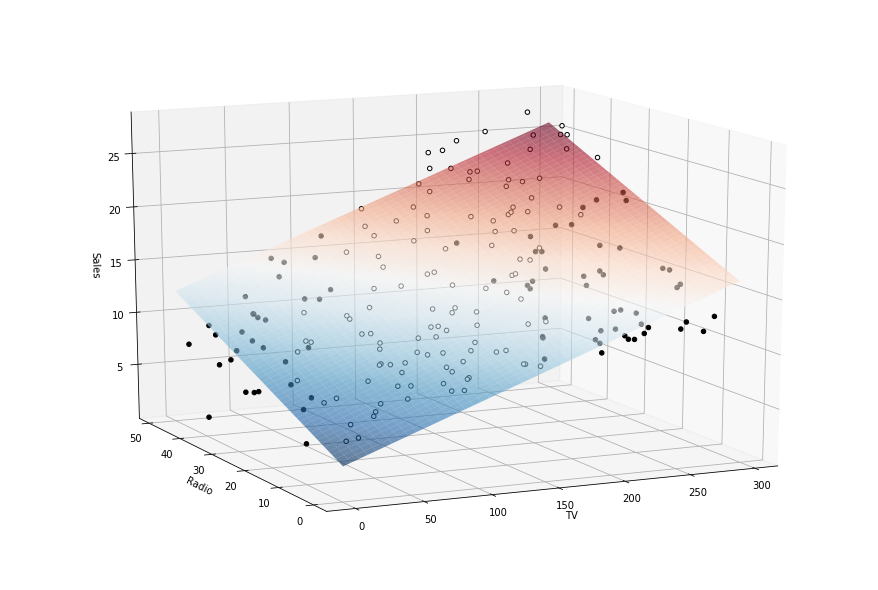

In [2]:
from mpl_toolkits.mplot3d import Axes3D

X = df_adv[['TV', 'Radio']]
y = df_adv['Sales']

## fit a OLS model with intercept on TV and Radio
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()

## Create the 3d plot -- skip reading this
# TV/Radio grid for 3d plot
xx1, xx2 = np.meshgrid(np.linspace(X.TV.min(), X.TV.max(), 100),
np.linspace(X.Radio.min(), X.Radio.max(), 100))
# plot the hyperplane by evaluating the parameters on the grid
Z = est.params[0] + est.params[1] * xx1 + est.params[2] * xx2

# create matplotlib 3d axes
fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig, azim=-115, elev=15)

# plot hyperplane
surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)

# plot data points - points over the HP are white, points below are black
resid = y - est.predict(X)
ax.scatter(X[resid >= 0].TV, X[resid >= 0].Radio, y[resid >= 0], color='black', alpha=1.0, facecolor='white')
ax.scatter(X[resid < 0].TV, X[resid < 0].Radio, y[resid < 0], color='black', alpha=1.0)

# set axis labels
ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')

In [3]:
#sklearn 
# create X and y
feature_cols = ['TV']
X = df_adv[feature_cols]
y = df_adv.Sales

# instantiate and fit
mlr = LinearRegression()
mlr.fit(X, y)

# print the coefficients
print(mlr.intercept_)
print(mlr.coef_)

7.032593549127695
[0.04753664]


In [4]:
# manually calculate the prediction
7.0326 + 0.0475*50

9.4076

In [5]:
#create new column 
df_adv['TV_dollars'] = df_adv.TV * 1000
df_adv.head()

TV  Radio  Newspaper  Sales  TV_dollars
1  230.1   37.8       69.2   22.1    230100.0
2   44.5   39.3       45.1   10.4     44500.0
3   17.2   45.9       69.3    9.3     17200.0
4  151.5   41.3       58.5   18.5    151500.0
5  180.8   10.8       58.4   12.9    180800.0

Let's say that there was a new market where the TV advertising spend was $50,000. What would we predict for the Sales in that market?

In [6]:
# create X and y
feature_cols = ['TV_dollars']
X = df_adv[feature_cols]
y = df_adv.Sales

# instantiate and fit
mlr = LinearRegression()
mlr.fit(X, y)

# print the coefficients
print(mlr.intercept_)
print(mlr.coef_)

7.032593549127694
[4.75366404e-05]


How do we interpret the TV_dollars coefficient (β1)?

* A "unit" increase in TV ad spending is associated with a 0.0000475 "unit" increase in Sales.
* Meaning: An additional dollar spent on TV ads is associated with an increase in sales of 0.0475 widgets.
* Meaning: An additional $1,000 spent on TV ads is associated with an increase in sales of 47.5 widgets.

## Polynomials 

A very popular non-linear regression technique is Polynomial Regression, a technique which models the relationship between the response and the predictors as an n-th order polynomial. The higher the order of the polynomial the more "wigglier" functions you can fit. Using higher order polynomial comes at a price, however. First, the computational complexity of model fitting grows as the number of adaptable parameters grows. Second, more complex models have a higher risk of overfitting. Overfitting refers to a situation in which the model fits the idiosyncrasies of the training data and loses the ability to generalize from the seen to predict the unseen.
[example](https://nbviewer.jupyter.org/urls/s3.amazonaws.com/datarobotblog/notebooks/multiple_regression_in_python.ipynb)

## Bias Variance Trade-Off 
In order to understand the bias/variance trade off we need to remember what overfitting and underfitting is: 

> **Underfitting** happens when a model cannot learn the training data, nor can it generalize to new data.

> **Overfitting** happens when a model learns the training data too well. In fact, so well that it is not generalizeable to new data

Mathematically, if we look at the equation of MSE(mean of our sum of squared errors)
$\frac{1}{n}\sum_{i=1}^{n}(y_{i} - \hat y_{i})^2$

We can apply bias and variance and it would like this: 

$ MSE = Bias(\hat{f}(x))^2 + Var(\hat{f}(x)) + \sigma^2$

Bias is usually associated with low model complexity, variance with high model complexity. 

![](https://files.ai-pool.com/a/eba93f5a75070f0fbb9d86bec8a009e9.png)

**So, what do you do if you have high bias or variance?** 



If we had high bias and low variance what should we do?
- Get rid of outliers 
- Increase model complexity by adding polynomial features 
- Get more data OR get more features(feature engineering) 

If we had low bias and high variance what should we do? 
- decrease the complexity 
- reduce the size of your training set
- reduce the variables 
- Get rid of outliers 

[Resource for understanding OLS](https://setosa.io/ev/ordinary-least-squares-regression/)